# Understanding the Attrition in HR

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('Understanding the Attrition in HR.csv')

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.head

<bound method NDFrame.head of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationFi

In [5]:
df.shape

(1470, 35)

There are 1470 rows and 35 columns

# Checking the datatypes of the columns

In [7]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [51]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

There are two unique values Yes and No

In [52]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# EDA

Univariate analysis

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


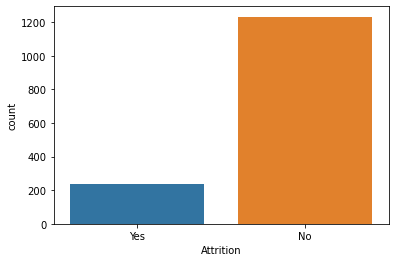

In [53]:
sns.countplot(df['Attrition']);

The two classes are not equally distributed.Class imbalance exists.

# Checking null values

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values present in the dataset.

# Heatmap for the representation of null values

<AxesSubplot:>

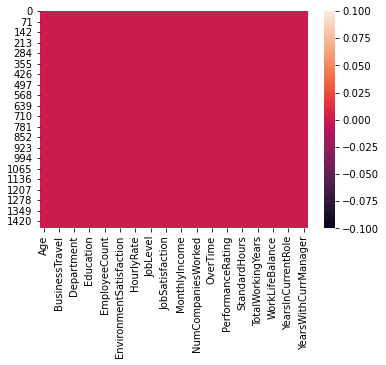

In [9]:
sns.heatmap(df.isnull())

The above map also shows the absence of null values.

# Dataframe Description

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?



# Summary Statistics

In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


High value of standard deviation in columns 'DailyRate' and 'EmployeeNumber'indicate that the data is widely spread and the range is high.

# Outliers

Checking the presence ofoutliers using a boxplot

Age                            AxesSubplot(0.125,0.536818;0.0466867x0.343182)
DailyRate                   AxesSubplot(0.181024,0.536818;0.0466867x0.343182)
DistanceFromHome            AxesSubplot(0.237048,0.536818;0.0466867x0.343182)
Education                   AxesSubplot(0.293072,0.536818;0.0466867x0.343182)
EmployeeCount               AxesSubplot(0.349096,0.536818;0.0466867x0.343182)
EmployeeNumber               AxesSubplot(0.40512,0.536818;0.0466867x0.343182)
EnvironmentSatisfaction     AxesSubplot(0.461145,0.536818;0.0466867x0.343182)
HourlyRate                  AxesSubplot(0.517169,0.536818;0.0466867x0.343182)
JobInvolvement              AxesSubplot(0.573193,0.536818;0.0466867x0.343182)
JobLevel                    AxesSubplot(0.629217,0.536818;0.0466867x0.343182)
JobSatisfaction             AxesSubplot(0.685241,0.536818;0.0466867x0.343182)
MonthlyIncome               AxesSubplot(0.741265,0.536818;0.0466867x0.343182)
MonthlyRate                 AxesSubplot(0.797289,0.536818;0.0466

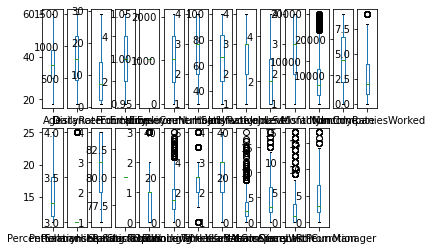

In [15]:
df.plot(kind='box',subplots=True,layout=(2,14))

From the above representation weget to know that outliers are present only in few columns,hence lets plot those columns individually for a clear understanding.

<AxesSubplot:>

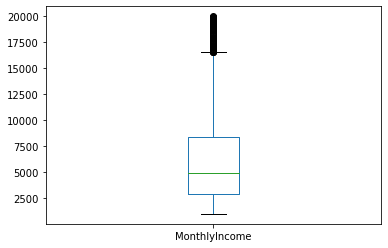

In [16]:
df['MonthlyIncome'].plot.box()

Outliers are present in this column.

<AxesSubplot:>

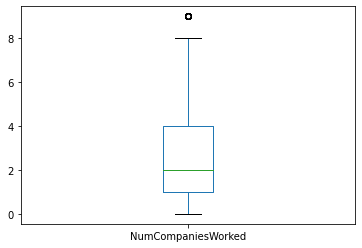

In [17]:
df['NumCompaniesWorked'].plot.box()

Outliers arepresent in this column.

<AxesSubplot:>

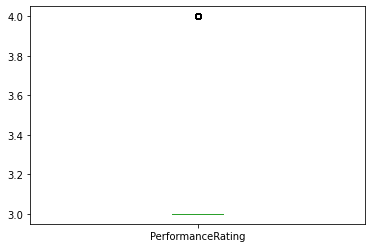

In [18]:
df['PerformanceRating'].plot.box()

Outliers are present in this column.

<AxesSubplot:>

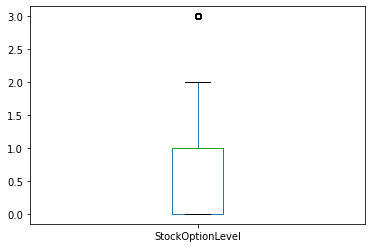

In [19]:
df['StockOptionLevel'].plot.box()

Outliers are present in this column.

<AxesSubplot:>

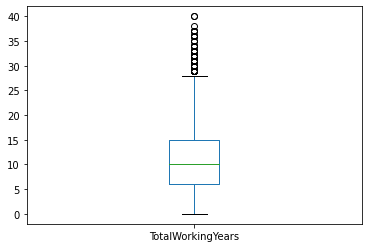

In [20]:
df['TotalWorkingYears'].plot.box()

Outliers are present in this column.

<AxesSubplot:>

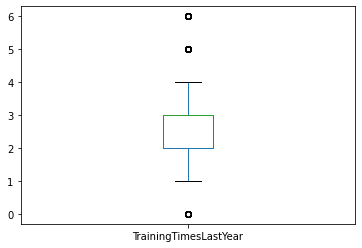

In [21]:
df['TrainingTimesLastYear'].plot.box()

Outliers are present in this column.

<AxesSubplot:>

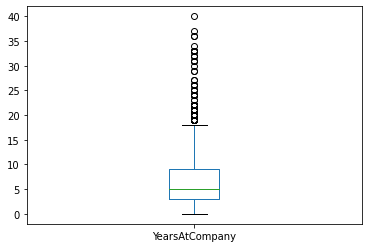

In [23]:
df['YearsAtCompany'].plot.box()

Outliers are present in this column.

<AxesSubplot:>

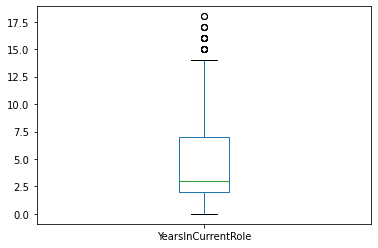

In [24]:
df['YearsInCurrentRole'].plot.box()

Outliers are present in this column.

<AxesSubplot:>

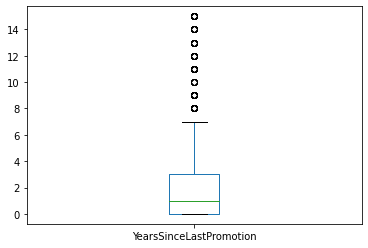

In [25]:
df['YearsSinceLastPromotion'].plot.box()

Outliers are present in this column.

<AxesSubplot:>

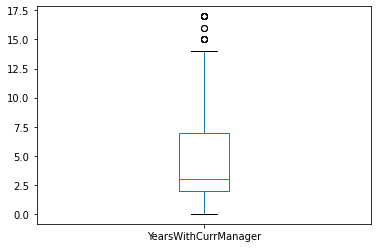

In [26]:
df['YearsWithCurrManager'].plot.box()

Outliers are prsent in this column.

Removal of outliers

In [94]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z


TypeError: unsupported operand type(s) for /: 'str' and 'int'

# Skewness

In [28]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

skewness threshold is taken as+/-0.65 and hence columns which are having skewness are 'Education'.'JobLevel '.'MonthlyIncome','NumCompaniesWorked','PerformanceRating','StockOptionLevel'
'TotalWorkingYears','YearsAtCompany ','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager' 

Graphical Representation of Skewness

<AxesSubplot:ylabel='Frequency'>

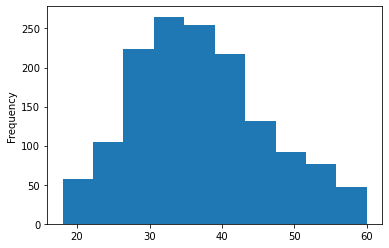

In [56]:
df['Age'].plot.hist()

skewness is below the threshold of +/-0.65

<AxesSubplot:ylabel='Frequency'>

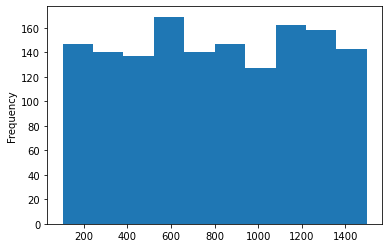

In [57]:
df['DailyRate'].plot.hist()

A very small skewness is present.

<AxesSubplot:ylabel='Frequency'>

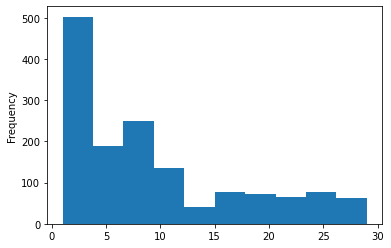

In [58]:
df['DistanceFromHome'].plot.hist()

skewnessis high and hence hasto be considered.

<AxesSubplot:ylabel='Frequency'>

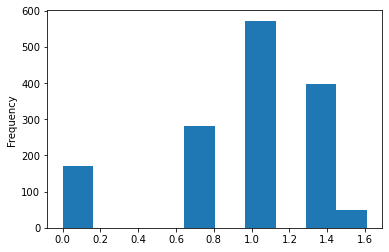

In [59]:
df['Education'].plot.hist()

skewness is below the threshold of +/-0.65

<AxesSubplot:ylabel='Frequency'>

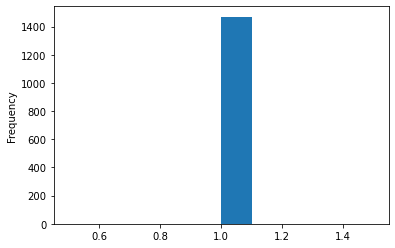

In [61]:
df['EmployeeCount'].plot.hist()

skewness is 0

<AxesSubplot:ylabel='Frequency'>

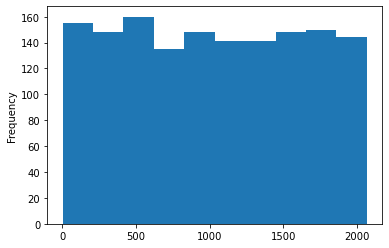

In [62]:
df['EmployeeNumber'].plot.hist()

A very small skewness is present.

<AxesSubplot:ylabel='Frequency'>

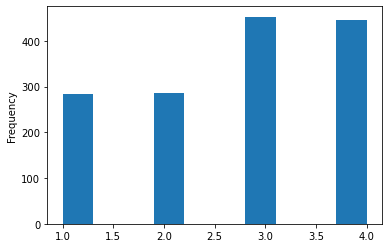

In [64]:
df['EnvironmentSatisfaction'].plot.hist()

skewness is below the threshold of +/-0.65

<AxesSubplot:ylabel='Frequency'>

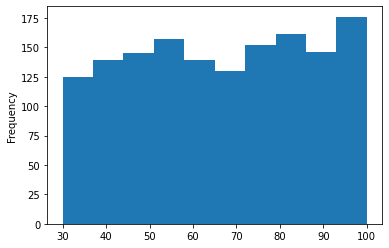

In [65]:
df['HourlyRate'].plot.hist()

skewness is below the threshold of +/-0.65

<AxesSubplot:ylabel='Frequency'>

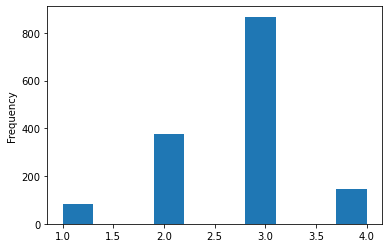

In [66]:
df['JobInvolvement'].plot.hist()

skewness is belowthethreshold value of+/-0.65

<AxesSubplot:ylabel='Frequency'>

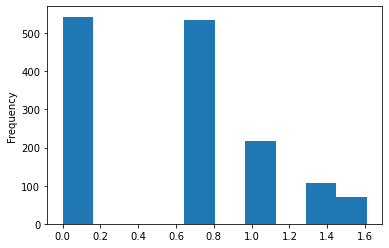

In [67]:
df['JobLevel'].plot.hist()

skewness is high hence need to be considered.

<AxesSubplot:ylabel='Frequency'>

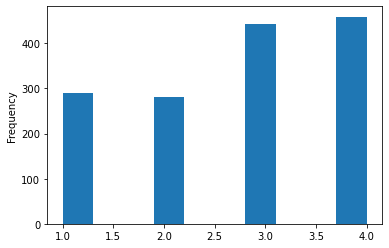

In [68]:
df['JobSatisfaction'].plot.hist()

skewness is below the threshold of +/-0.65

<AxesSubplot:ylabel='Frequency'>

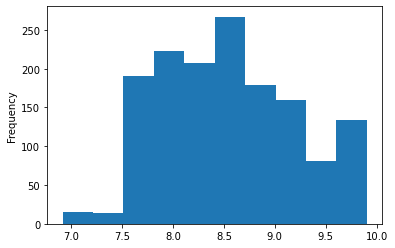

In [69]:
df['MonthlyIncome'].plot.hist()

skewness is high hence need to be considered.

<AxesSubplot:ylabel='Frequency'>

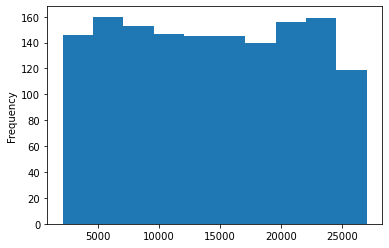

In [70]:
df['MonthlyRate'].plot.hist()

A very small skewness is present.

<AxesSubplot:ylabel='Frequency'>

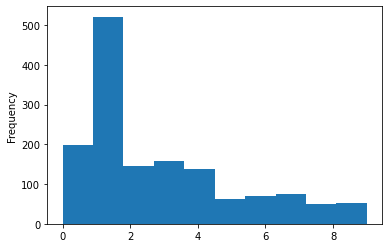

In [71]:
df['NumCompaniesWorked'].plot.hist()

skewness is high hence need to be considered.

<AxesSubplot:ylabel='Frequency'>

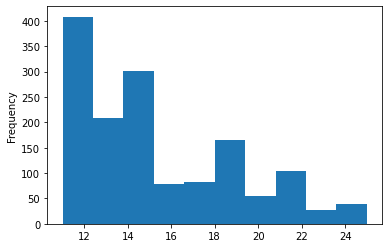

In [72]:
df['PercentSalaryHike'].plot.hist()

skewness is a little more than the threshold value of +/-0.65

<AxesSubplot:ylabel='Frequency'>

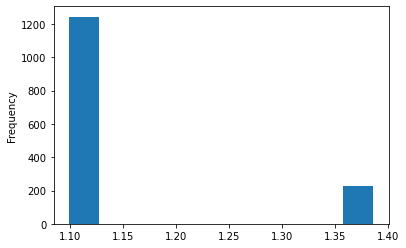

In [73]:
df['PerformanceRating'].plot.hist()

skewness is high

<AxesSubplot:ylabel='Frequency'>

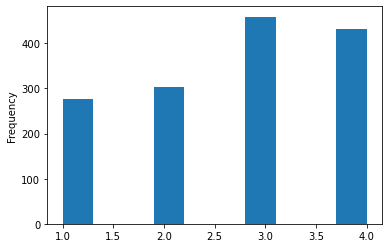

In [75]:
df['RelationshipSatisfaction'].plot.hist()

skewness is below the threshold value of+/-0.65

<AxesSubplot:ylabel='Frequency'>

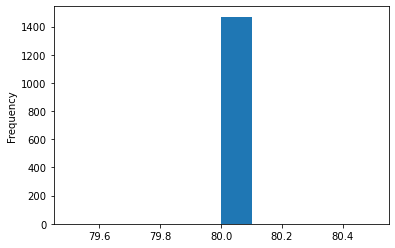

In [77]:
df['StandardHours'].plot.hist()

skewness is 0

<AxesSubplot:ylabel='Frequency'>

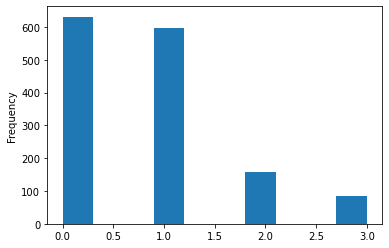

In [78]:
df['StockOptionLevel'].plot.hist()

skewness is high

<AxesSubplot:ylabel='Frequency'>

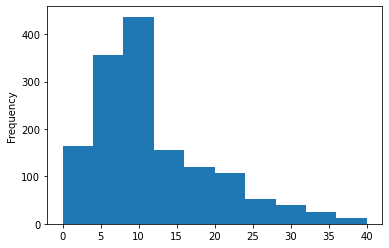

In [79]:
df['TotalWorkingYears'].plot.hist()

skewness is high

<AxesSubplot:ylabel='Frequency'>

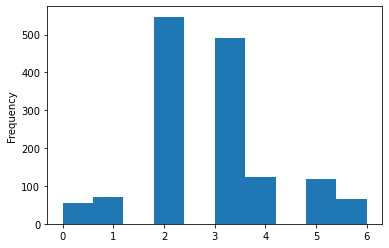

In [81]:
df['TrainingTimesLastYear'].plot.hist()

skewness is below the threshold of +/-0.65

<AxesSubplot:ylabel='Frequency'>

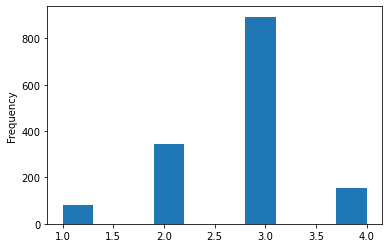

In [82]:
df['WorkLifeBalance'].plot.hist()

skewness is below the threshold of +/-0.65

<AxesSubplot:ylabel='Frequency'>

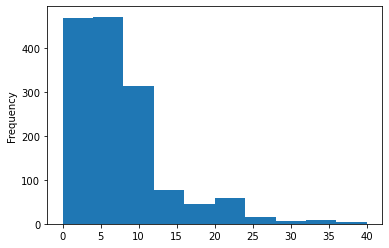

In [83]:
df['YearsAtCompany'].plot.hist()

skewness is high

<AxesSubplot:ylabel='Frequency'>

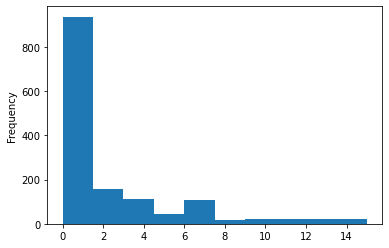

In [84]:
df['YearsSinceLastPromotion'].plot.hist()

skewness is high

<AxesSubplot:ylabel='Frequency'>

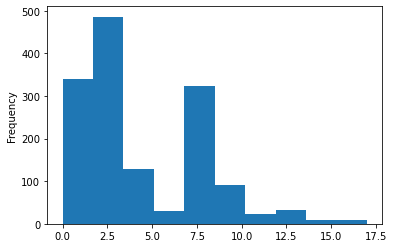

In [85]:
df['YearsWithCurrManager'].plot.hist()

skewnessis high

Removing the skewness

In [30]:
from scipy.stats import boxcox
#0--->log transform
#.5--->square root transform
df['Education']=boxcox(df['Education'],0)

<AxesSubplot:ylabel='Frequency'>

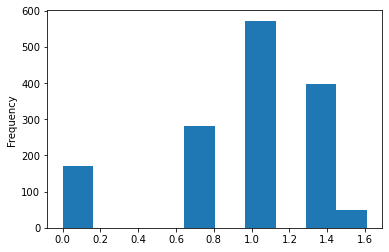

In [31]:
df['Education'].plot.hist()

In [32]:
df['JobLevel']=boxcox(df['JobLevel'],0)

<AxesSubplot:ylabel='Frequency'>

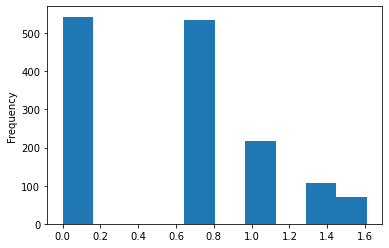

In [33]:
df['JobLevel'].plot.hist()

In [34]:
df['MonthlyIncome']=boxcox(df['MonthlyIncome'],0)

<AxesSubplot:ylabel='Frequency'>

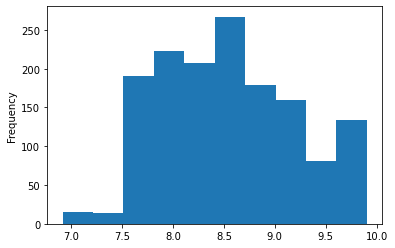

In [36]:
df['MonthlyIncome'].plot.hist()

In [38]:
df['NumCompaniesWorked ']=boxcox(df['NumCompaniesWorked'],0.5)

ValueError: Data must be positive.

skewnesscannot be removed since data is not positive.

In [39]:
df['PerformanceRating']=boxcox(df['PerformanceRating'],0)

<AxesSubplot:ylabel='Frequency'>

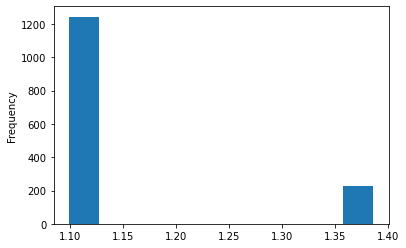

In [40]:
df['PerformanceRating'].plot.hist()

In [41]:
df['StockOptionLevel']=boxcox(df['StockOptionLevel'],0)

ValueError: Data must be positive.

skewness cannot be removed since data is not positive.

In [42]:
df['TotalWorkingYears']=boxcox(df['TotalWorkingYears'],0)

ValueError: Data must be positive.

skewness cannot be removed since data is not positive.

In [44]:
df['YearsAtCompany']=boxcox(df['YearsAtCompany'],.5)

ValueError: Data must be positive.

skewness cannot be removed since data is not positive.

In [45]:
df['YearsInCurrentRole ']=boxcox(df['YearsInCurrentRole'],.5)

ValueError: Data must be positive.

skewness cannot be removed since data is not positive.

In [47]:
df['YearsSinceLastPromotion']=boxcox(df['YearsSinceLastPromotion'],0)

ValueError: Data must be positive.

skewness cannot be removed since data is not positive.

In [48]:
df['YearsWithCurrManager']=boxcox(df['YearsWithCurrManager'],0)

ValueError: Data must be positive.

skewness cannot be removed since data is not positive.

# Correlation:

In [49]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.211757,NaN,-0.010145,0.010146,0.024287,0.029820,0.491677,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.020540,NaN,-0.050990,0.018355,0.023381,0.046135,0.002154,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021092,NaN,0.032916,-0.016075,0.031131,0.008783,0.026246,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.211757,-0.020540,0.021092,1.000000,NaN,0.042426,-0.020955,0.015733,0.047191,0.115422,...,-0.009970,NaN,0.019927,0.146737,-0.026703,0.002940,0.060782,0.056354,0.050866,0.067208
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042426,NaN,1.000000,0.017621,0.035179,-0.006888,-0.010886,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.020955,NaN,0.017621,1.000000,-0.049857,-0.008278,0.000429,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.015733,NaN,0.035179,-0.049857,1.000000,0.042861,-0.032655,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.047191,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.014759,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.491677,0.002154,0.026246,0.115422,NaN,-0.010886,0.000429,-0.032655,-0.014759,1.000000,...,0.012325,NaN,0.025780,0.741100,-0.015080,0.044096,0.514629,0.409563,0.337936,0.392799


corelation using heatmap

<AxesSubplot:>

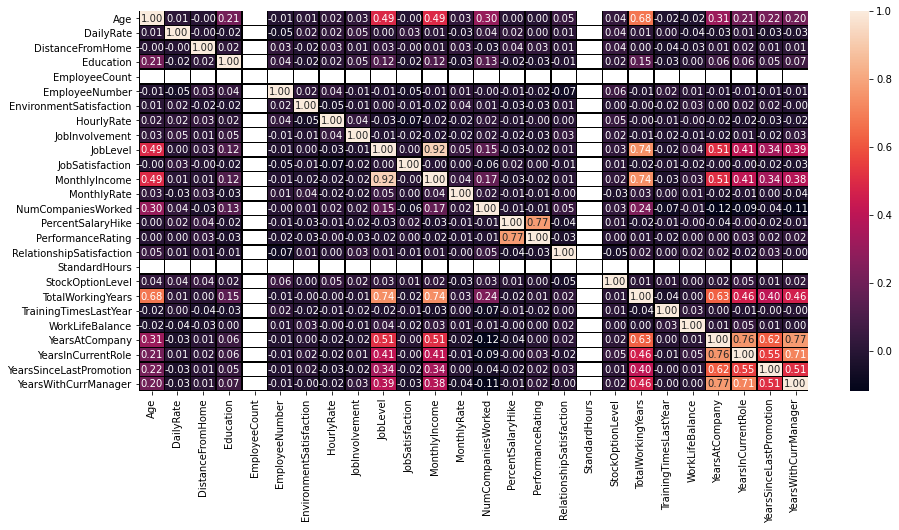

In [50]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

In [95]:
#dropthe YearsWithCurrManager
df.drop('YearsWithCurrManager',axis=1,inplace=True)

In [97]:
#dropthe YearsWithCurrManager
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,1102,Sales,1,0.693147,Life Sciences,1,1,...,1.098612,1,80,0,8,0,1,6,4,0
1,49,No,Travel_Frequently,279,Research & Development,8,0.000000,Life Sciences,1,2,...,1.386294,4,80,1,10,3,3,10,7,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,0.693147,Other,1,4,...,1.098612,2,80,0,7,3,3,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,1.386294,Life Sciences,1,5,...,1.098612,3,80,0,8,3,3,8,7,3
4,27,No,Travel_Rarely,591,Research & Development,2,0.000000,Medical,1,7,...,1.098612,4,80,1,6,3,3,2,2,2


In [100]:
z=np.abs(zscore(df))
z

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [99]:
df_new=df[(z<3).all(axis=1)]

NameError: name 'z' is not defined

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

Model without outliers is df andmodel with desired outliers is df_new:

Dividing the data into features nd vectors:

In [92]:
#independent features:
x=df_new.iloc[:,:-1]

#dependent fetures:
y=df_new.iloc[:,-1]

NameError: name 'df_new' is not defined

In [88]:
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,ranom_state=i)
    lm=DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100,'at random_state',i)


NameError: name 'x' is not defined

it is a logistic regression problem